In [2]:
from diffusers import StableDiffusionImg2ImgPipeline


pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.enable_model_cpu_offload()

Couldn't connect to the Hub: 504 Server Error: Gateway Time-out for url: https://huggingface.co/api/models/runwayml/stable-diffusion-v1-5.
Will try to load from local cache.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/s0001900/dev/nerf-thesis


/home/s0001900/dev/nerf-thesis/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


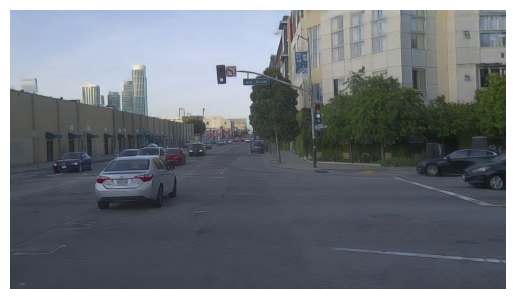

In [ ]:
from src.data import read_image
from src.utils import show_img

ex_img = "reference/pandaset-01/renders/0m/01.jpg"
img = read_image(ex_img)
show_img(img)

In [ ]:
import torch
import torchvision.transforms.v2 as tv2

img = img.to("cuda")
downsample = tv2.Resize((1080//4, 1920//4))


model_input = pipe.vae.encode(img[None, ...]).latent_dist.sample()
model_input = model_input * pipe.vae.config.scaling_factor

noise = torch.randn(model_input.shape)
latents = pipe.scheduler.add_noise(model_input, noise, [1])

latents = latents / pipe.vae.config.scaling_factor
new_img = pipe.vae.decode(latents)

torch.Size([3, 1080, 1920])


OutOfMemoryError: CUDA out of memory. Tried to allocate 1014.00 MiB. GPU 0 has a total capacity of 7.78 GiB of which 318.06 MiB is free. Including non-PyTorch memory, this process has 6.44 GiB memory in use. Of the allocated memory 5.47 GiB is allocated by PyTorch, and 52.58 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)